### Notes on Thesis

This notebook is intended to help with the general framework of the thesis. Here, I explore general remarks of the data. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Q: Does this DB contains ELMs?
o = pd.read_csv("data/O.csv") # original: DB4
# general note on e.csv: error in datetime "19990300"

# Q: is this with ELMs or withou ELMs?
r = pd.read_csv("data/R.csv") # reintroduce: DB5 to be added to DB4
r.DATE = pd.to_datetime(r.DATE, format="%Y%m%d")

data = pd.read_csv("data/data.csv") # general DB5
DB5 = pd.read_csv("data/SELDB5.csv", low_memory=False)

baseline = pd.read_csv("data/Baseline_regression_values.csv")

In [3]:
toks = data["TOK_added"].unique()

In [4]:
len(DB5)

14153

In [5]:
DB5["TOK"].unique()

array(['ASDEX', 'AUG', 'AUGW', 'CMOD', 'COMPASS', 'D3D', 'JET', 'JETILW',
       'JFT2M', 'JT60U', 'MAST', 'NSTX', 'PBXM', 'PDX', 'START', 'T10',
       'TCV', 'TDEV', 'TEXTOR', 'TFTR', 'TUMAN3M'], dtype=object)

In [6]:
DB5[DB5["TOK"].isin(toks)]

,ind,TOK,TOK_ID,DIVNAME,LCUPDATE,DATE,SHOT,TIME,TIME_ID,T1,...,LMEFF,LPLTH,LTAUTH/NEL^0.2,LBTAUTH,LNUSTAR,LNUSTARNOQ,LRHOSTAR,LQ95,LBETATH,EPS
1470,1471,AUG,2,DIV-I,20000531,19940609,4670,2.50,2500,2.4,...,0.693147,15.195032,NaN,NaN,NaN,NaN,NaN,1.683060,NaN,0.299327
1471,1472,AUG,2,DIV-I,20000531,19940609,4670,3.00,3000,2.9,...,0.693147,15.571297,NaN,NaN,NaN,NaN,NaN,1.696349,NaN,0.297677
1472,1473,AUG,2,DIV-I,20000531,19940609,4670,3.50,3500,3.4,...,0.693147,15.859195,NaN,NaN,NaN,NaN,NaN,1.709283,NaN,0.297738
1473,1474,AUG,2,DIV-I,20000531,19940609,4683,3.10,3100,3.0,...,0.693147,15.006702,NaN,NaN,NaN,NaN,NaN,1.681200,NaN,0.300244
1474,1475,AUG,2,DIV-I,20000531,19940609,4683,3.50,3500,3.4,...,0.693147,15.436679,NaN,NaN,NaN,NaN,NaN,1.694330,NaN,0.297861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10616,10617,JETILW,6,ILW,20190730,20161110,92436,50.00,50000,49.5,...,0.683771,17.302054,-10.507801,-0.330050,-2.731413,-3.838335,-5.747004,1.106922,-3.872004,0.328318
10617,10618,JETILW,6,ILW,20190730,20161110,92437,52.25,52250,51.0,...,0.685088,17.183288,-10.466445,-0.131229,-1.785024,-2.805769,-6.010585,1.020745,-4.056030,0.328463
10618,10619,JETILW,6,ILW,20190730,20161110,92439,49.00,49000,48.5,...,0.691446,16.277421,-10.456104,-0.631800,-1.092192,-2.204355,-5.836558,1.112164,-4.169614,0.327916
10619,10620,JETILW,6,ILW,20190730,20161110,92442,52.15,52150,51.5,...,0.684600,17.288175,-10.512111,-0.172806,-1.854762,-2.880913,-5.991708,1.026150,-3.995817,0.329481


In [7]:
print(list(DB5.columns), )

['ind', 'TOK', 'TOK_ID', 'DIVNAME', 'LCUPDATE', 'DATE', 'SHOT', 'TIME', 'TIME_ID', 'T1', 'T2', 'AUXHEAT', 'PHASE', 'HYBRID', 'ITB', 'ITBTYPE', 'ELMTYPE', 'ELMFREQ', 'ELMMAX', 'ELMDUR', 'ELMINT', 'OLTIME', 'LHTIME', 'TPI', 'ISEQ', 'MEFF', 'PGASA', 'PGASZ', 'BGASA', 'BGASZ', 'BGASA2', 'BGASZ2', 'PELLET', 'FUELRATE', 'XGASZ', 'XGASA', 'CONFIG', 'RGEO', 'RMAG', 'AMIN', 'KAPPA', 'KAPPAA', 'KAREA', 'DELTA', 'DELTAU', 'DELTAL', 'INDENT', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'XPLIM', 'WALMAT', 'DIVMAT', 'LIMMAT', 'EVAP', 'DALFMP', 'DALFDV', 'IGRADB', 'BT', 'IEML', 'PREMAG', 'IP', 'VSURF', 'Q95', 'SH95', 'BEILI2', 'BEIMHD', 'BEPMHD', 'BETMHD', 'BEPDIA', 'BMHDMDIA', 'TAUCR', 'FBS', 'RHOQ2', 'RHOINV', 'NEL', 'NELFORM', 'DNELDT', 'NEV', 'NE0', 'NE0TSC', 'ZEFF', 'ZEFFNEO', 'PRAD', 'POHM', 'ENBI', 'PINJ', 'BSOURCE', 'PINJ2', 'BSOURCE2', 'COCTR', 'PNBI', 'PFLOSS', 'ECHFREQ', 'ECHMODE', 'ECHLOC', 'PECRHC', 'PECRH', 'ICFREQ', 'ICSCHEME', 'ICANTEN', 'PICRHC', 'PICRH', 'PALPHA', 'DWDIA', 'DWDIAPAR', 'DWM

In [8]:
r.sort_values("TAUTH")

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,TOK,SHOT,DATE,TIME,ind
482,-3.810821,-0.914293,0.400788,1.541159,1.830980,0.494086,0.426574,-1.218105,0.693147,AUG,15489,2002-03-12,3.400000,2366
730,-3.786713,-0.510159,0.328584,1.769343,2.379546,0.512824,0.503197,-1.234782,0.693147,AUG,19111,2004-06-03,5.500000,2950
470,-3.720990,-0.915541,0.687129,1.529962,1.813195,0.494086,0.413433,-1.220583,0.693147,AUG,15456,2002-03-07,5.400000,2347
363,-3.720577,-0.918543,0.905028,1.353255,1.335001,0.484276,0.440189,-1.151561,0.693147,AUG,12535,1999-07-30,3.385000,2127
1466,-3.678929,-0.515168,0.621651,1.811072,2.312535,0.508623,0.479335,-1.249701,0.693147,AUGW,34767,2017-10-10,4.000000,3844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,-0.383456,1.383731,1.159712,1.480309,2.181848,1.060817,0.454283,-1.096600,0.715472,JET,62131,2003-12-10,56.892792,9652
1776,-0.361544,0.915891,0.894045,1.779518,2.013035,1.077729,0.477857,-1.170722,0.686626,JET,47307,1999-02-18,62.441772,8782
2408,-0.350914,1.231322,1.008713,1.080640,1.561290,1.060316,0.449910,-1.092006,0.693147,JET,60580,2003-08-19,58.134796,9517
2466,-0.338979,0.849332,0.682751,0.910749,0.943184,1.061350,0.431005,-1.093111,0.693147,JET,61132,2003-10-01,63.144196,9592


In [9]:
o.sort_values("TAUTH") 

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,TOK,SHOT,DATE,TIME,ind
2747,-6.103067,-1.643512,-1.293898,1.617803,-0.252186,-1.250366,0.389336,-0.261945,0.530628,START,34887,19971111,0.041,12029
2745,-6.080077,-1.569256,-1.290984,1.591885,-0.206655,-1.253513,0.399447,-0.267456,0.530628,START,34877,19971111,0.041,12027
2746,-6.026470,-1.539912,-1.318262,1.555404,-0.198451,-1.225537,0.406132,-0.273254,0.530628,START,34882,19971111,0.041,12028
2748,-5.977956,-1.530165,-1.302321,1.514468,-0.332401,-1.236496,0.411447,-0.278996,0.530628,START,36078,19980303,0.042,12031
2752,-5.857283,-1.334081,-1.234776,1.629437,-0.257606,-1.170216,0.256191,-0.244478,0.530628,START,36437,19980327,0.039,12035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.067659,1.347554,1.087551,1.422385,1.635885,1.059178,0.452088,-1.091185,0.693147,JET,38721,19960920,57.370,7057
1611,0.178146,1.141033,0.851005,0.715887,1.169692,1.051521,0.572921,-1.042561,0.693147,JET,22883,19901009,53.010,6466
1614,0.180653,1.138153,0.853564,0.810930,1.147085,1.051171,0.573291,-1.043203,0.693147,JET,22884,19901009,53.530,6472
1615,0.188966,1.138474,0.853138,0.800655,1.201770,1.051521,0.573923,-1.043553,0.693147,JET,22884,19901009,53.810,6473


* Thermal energy confinement time: $\tau_{E,th} = W_{th}/P_{l,th}$ [s]
    - Thermal stored energy: $W_{th}$
* Intercept of the regression: $\alpha_0$    
* Plasma current: $I_P$ [MA]
* Vacuum toroidal magnetic field: $B_t$ [T]
* Central line-averaged electron density: $\bar{n}_e$ [$\cdot$10$^{19}$ m $^{-3}$] 
* Thermal power lost due to the transport through the LCFS: $P_{l,th}$ [MW]
* Major radius: $R_{geo}$ [m]
* Elongation of the last-closed flux surface: $\kappa = V/(2\pi R_{geo}\pi a^2)$ 
    - Plasma volume inside the LCFS: V [m$^{3}$]
    - Minor radius: $a$ [m] 
* Inverse aspect ration: $\epsilon = a/R_{geo}$ 
    - large $\epsilon$ = spherical tokamak (NSTX and MAST)
* Effective atomic mass of the plasma $M_{eff}$

$$
    \tau_{E,th} = \alpha_0\cdot I_P^{\alpha_I}\cdot B^{\alpha_B}_t\cdot \bar{n}^{\alpha_n}_e  \cdot P^{\alpha_P}_{l,th}\cdot R^{\alpha_R}_{geo}\cdot \kappa^{\alpha_\kappa}_a\cdot \epsilon^{\alpha_\epsilon}\cdot M^{\alpha_M}_{eff}
$$

In [10]:
# DB4 - ITER LIKE SUBSET or r.csv?
# OLS -- more robust method? -- would I find different / interesting subsets?
# Engineering
baseline

,α0,αI,αB,αP,αn,αM,αR,αe,αk
0,0.105675,0.770171,0.238516,-0.608801,0.383818,0.184438,1.99426,0.715733,0.432187


In [11]:
# Parameters obtained with new insertion 
# OLS
data.head()

,TOK_added,DATE_added,SHOT_added,TIME_added,α0,αI,αB,αP,αn,αM,αR,αe,αk,ind_added,id
0,AUG,19950518,6483,4.000,0.105670,0.770548,0.238560,-0.608545,0.382818,0.184311,1.99294,0.715038,0.431763,1515,1
1,AUG,19960223,7555,2.498,0.105675,0.770298,0.238353,-0.608776,0.383779,0.184398,1.99415,0.715524,0.431860,1529,2
2,AUG,19960301,7634,3.499,0.105664,0.770694,0.238136,-0.608774,0.383673,0.184313,1.99367,0.714873,0.431415,1532,3
3,AUG,19960301,7639,3.500,0.105666,0.770447,0.238338,-0.608788,0.383720,0.184357,1.99393,0.715307,0.431781,1533,4
4,AUG,19960301,7640,3.501,0.105665,0.770471,0.238325,-0.608794,0.383715,0.184350,1.99391,0.715278,0.431757,1534,5


In [12]:
data.columns[4:-2]

Index(['α0', 'αI', 'αB', 'αP', 'αn', 'αM', 'αR', 'αe', 'αk'], dtype='object')

In [13]:
def df_tk(idx):   
    df = data[data.TOK_added.isin([toks[idx]])]
    return df

def plot_param(parameter):
    s = 7
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.scatter( df_tk(0)["id"], df_tk(0)[parameter], c="cadetblue", s=s, label = toks[0])
    plt.scatter( df_tk(1)["id"], df_tk(1)[parameter], c="yellowgreen", s=s, label = toks[1])
    plt.scatter( df_tk(2)["id"], df_tk(2)[parameter], c="coral", s=s, label = toks[2])
    plt.scatter( df_tk(3)["id"], df_tk(3)[parameter], c="pink", s=s, label = toks[3])
    plt.axhline(y=baseline[parameter][0], color='k', linestyle='-')
    plt.title(f"{parameter}", fontsize=15)    
    plt.xticks([])
    plt.yticks(fontsize=11)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), 
              frameon=False, fontsize=12)
    plt.plot()

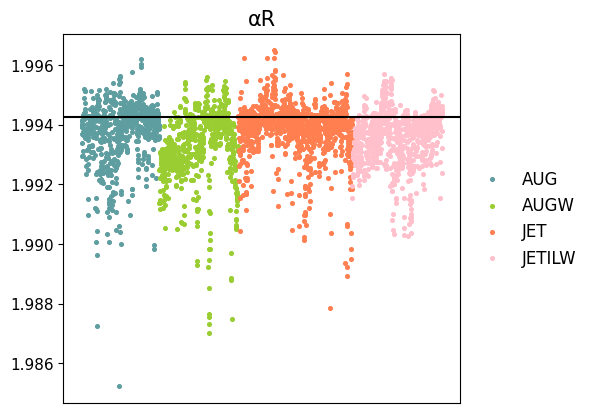

In [14]:
plot_param("αR")

In [15]:
toks

array(['AUG', 'AUGW', 'JET', 'JETILW'], dtype=object)

In [16]:
o["TOK"].unique()

array(['ASDEX', 'AUG', 'CMOD', 'COMPASS', 'D3D', 'JET', 'JFT2M', 'JT60U',
       'MAST', 'NSTX', 'PBXM', 'PDX', 'START', 'TCV', 'TDEV', 'TFTR'],
      dtype=object)

In [17]:
r["TOK"].unique()

array(['AUG', 'AUGW', 'JET', 'JETILW'], dtype=object)